### Importation des données et nettoyage

In [56]:
import pandas as pd

In [57]:
data = pd.read_csv("guillaume.txt", sep=";", na_values=[""])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13136\2539723753.py:1: DtypeWarning: Columns (1,2,5,6,7,8,9,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("guillaume.txt", sep=";", na_values=[""])


In [31]:
data.head(2)

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20,2017-02-01 07:32:14,1,0,0,0,551,...,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
1,A013011306908024927155000,78643045,0,20,2017-02-01 07:43:37,1,0,0,0,551,...,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817


Suppression d'une ligne dont les éléments contenant tout simplement le nom de la variable et non la valeur associée

In [62]:
print(data.shape)
data = data.drop(1956360, axis=0)
print(data.shape)

Vérification de l'absence de valeurs manquantes

In [128]:
data.isna().value_counts()

ZIBZIN  IDAvisAutorisationCheque  FlagImpaye  Montant  DateTransaction  CodeDecision  VerifianceCPT1  VerifianceCPT2  VerifianceCPT3  D2CB   ScoringFP1  ScoringFP2  ScoringFP3  TauxImpNb_RB  TauxImpNB_CPM  EcartNumCheq  NbrMagasin3J  DiffDateTr1  DiffDateTr2  DiffDateTr3  CA3TRetMtt  CA3TR  Heure
False   False                     False       False    False            False         False           False           False           False  False       False       False       False         False          False         False         False        False        False        False       False  False    4646773
Name: count, dtype: int64

Transtypage des éléments des colonnes de type mixte en un type unique

In [65]:
for col in data.columns:
    print(f"{col} = {data[col].apply(type).unique()}")

ZIBZIN = [<class 'str'>]
IDAvisAutorisationCheque = [<class 'int'> <class 'str'>]
FlagImpaye = [<class 'int'> <class 'str'>]
Montant = [<class 'str'>]
DateTransaction = [<class 'str'>]
CodeDecision = [<class 'int'> <class 'str'>]
VerifianceCPT1 = [<class 'int'> <class 'str'>]
VerifianceCPT2 = [<class 'int'> <class 'str'>]
VerifianceCPT3 = [<class 'int'> <class 'str'>]
D2CB = [<class 'int'> <class 'str'>]
ScoringFP1 = [<class 'str'>]
ScoringFP2 = [<class 'str'>]
ScoringFP3 = [<class 'str'>]
TauxImpNb_RB = [<class 'str'>]
TauxImpNB_CPM = [<class 'str'>]
EcartNumCheq = [<class 'int'> <class 'str'>]
NbrMagasin3J = [<class 'int'> <class 'str'>]
DiffDateTr1 = [<class 'str'>]
DiffDateTr2 = [<class 'str'>]
DiffDateTr3 = [<class 'str'>]
CA3TRetMtt = [<class 'str'>]
CA3TR = [<class 'str'>]
Heure = [<class 'int'> <class 'str'>]


In [129]:
data["IDAvisAutorisationCheque"] = data["IDAvisAutorisationCheque"].apply(lambda x: str(x) if type(x)==int else x)
data["FlagImpaye"] = data["FlagImpaye"].apply(lambda x: str(x) if type(x)==int else x)
data["Montant"] = data["Montant"].str.replace(",",".").apply(lambda x: float(x))
# data["DateTransaction"]
data["CodeDecision"] = data["CodeDecision"].apply(lambda x: int(x) if type(x)==str else x)
data["VerifianceCPT1"] = data["VerifianceCPT1"].apply(lambda x: int(x) if type(x)==str else x)
data["VerifianceCPT2"] = data["VerifianceCPT2"].apply(lambda x: int(x) if type(x)==str else x)
data["VerifianceCPT3"] = data["VerifianceCPT3"].apply(lambda x: int(x) if type(x)==str else x)
data["D2CB"] = data["D2CB"].apply(lambda x: int(x) if type(x)==str else x)
data["ScoringFP1"] = data["ScoringFP1"].str.replace(",",".").apply(lambda x: float(x))
data["ScoringFP2"] = data["ScoringFP2"].str.replace(",",".").apply(lambda x: float(x))
data["ScoringFP3"] = data["ScoringFP3"].str.replace(",",".").apply(lambda x: float(x))
data["TauxImpNb_RB"] = data["TauxImpNb_RB"].str.replace(",",".").apply(lambda x: float(x))
data["TauxImpNB_CPM"] = data["TauxImpNB_CPM"].str.replace(",",".").apply(lambda x: float(x))
data["EcartNumCheq"] = data["EcartNumCheq"].apply(lambda x: int(x) if type(x)==str else x)
data["NbrMagasin3J"] = data["NbrMagasin3J"].apply(lambda x: int(x) if type(x)==str else x)
data["DiffDateTr1"] = data["DiffDateTr1"].str.replace(",",".").apply(lambda x: float(x))
data["DiffDateTr2"] = data["DiffDateTr2"].str.replace(",",".").apply(lambda x: float(x))
data["DiffDateTr3"] = data["DiffDateTr3"].str.replace(",",".").apply(lambda x: float(x))
data["CA3TR"] = data["CA3TR"].str.replace(",",".").astype(float)
data["CA3TRetMtt"] = data["CA3TRetMtt"].str.replace(",",".").astype(float)
data["Heure"] = data["Heure"].apply(lambda x: int(x) if type(x)==str else x)

In [130]:
for col in data.columns:
    print(f"{col} = {data[col].apply(type).unique()}")

ZIBZIN = [<class 'str'>]
IDAvisAutorisationCheque = [<class 'str'>]
FlagImpaye = [<class 'str'>]
Montant = [<class 'float'>]
DateTransaction = [<class 'str'>]
CodeDecision = [<class 'int'>]
VerifianceCPT1 = [<class 'int'>]
VerifianceCPT2 = [<class 'int'>]
VerifianceCPT3 = [<class 'int'>]
D2CB = [<class 'int'>]
ScoringFP1 = [<class 'float'>]
ScoringFP2 = [<class 'float'>]
ScoringFP3 = [<class 'float'>]
TauxImpNb_RB = [<class 'float'>]
TauxImpNB_CPM = [<class 'float'>]
EcartNumCheq = [<class 'int'>]
NbrMagasin3J = [<class 'int'>]
DiffDateTr1 = [<class 'float'>]
DiffDateTr2 = [<class 'float'>]
DiffDateTr3 = [<class 'float'>]
CA3TRetMtt = [<class 'float'>]
CA3TR = [<class 'float'>]
Heure = [<class 'int'>]


Transformation au format compressé .parquet (+900 Mo -> -300 Mo)

In [131]:
data.to_parquet("bank_data.parquet")

### Exploratory Data Analysis

In [1]:
import pandas as pd
import duckdb as ddb
import seaborn as sns

In [2]:
data = pd.read_parquet("bank_data.parquet")

In [3]:
data.head(2)

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.0,2017-02-01 07:32:14,1,0,0,0,551,...,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,27134
1,A013011306908024927155000,78643045,0,20.0,2017-02-01 07:43:37,1,0,0,0,551,...,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817


In [ ]:
# sns.barplot(data, x= "FlagImpaye");

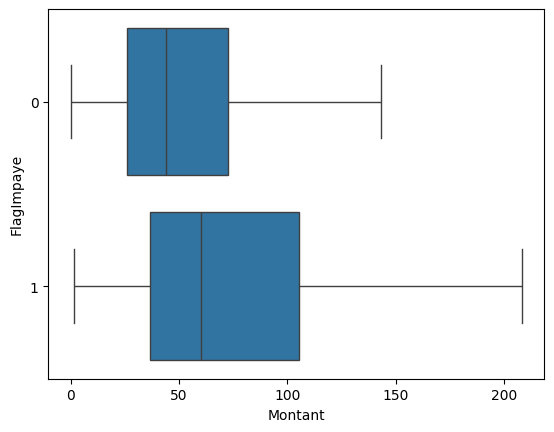

In [20]:
sns.boxplot(data, x="Montant", y="FlagImpaye", showfliers=False);

In [22]:
# sns.boxplot(data, x="CodeDecision", y="Montant", showfliers=False); # très long

: 

: 

In [ ]:
# sns.pairplot(data) # très long

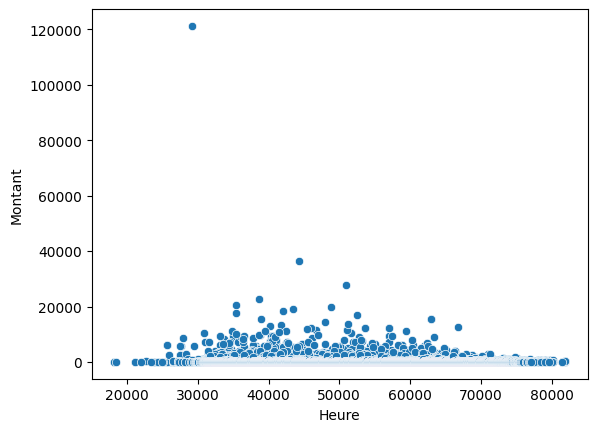

In [21]:
sns.scatterplot(data, x="Heure", y="Montant");